# <center> Network Data Science with NetworkX

In [63]:
import pandas as pd
import networkx as nx
from random import sample
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

## Load Graphs from Excel Spreadsheet Files

In [8]:
path = 'https://github.com/dnllvrvz/Social-Network-Dataset/raw/master/Social%20Network%20Dataset.xlsx'

In [9]:
network_data = pd.read_excel(path, sheet_name=['Elements', 'Connections'])

In [11]:
elements_data = network_data['Elements'] # nodes
connections_data = network_data['Connections'] # edges

In [12]:
edge_cols = ['Type', 'Weight', 'When']

graph = nx.convert_matrix.from_pandas_edgelist(connections_data,
                                              source='From',
                                              target='To',
                                              edge_attr=edge_cols)

In [15]:
sampled_edges = sample(graph.edges, 10)
graph.edges[sampled_edges[0]]

{'Type': nan, 'Weight': 0.4, 'When': 2015.0}

In [17]:
node_dict = elements_data.set_index('Label').to_dict(orient='index')
# sets node attributes in graph to those mentioned in node_dict
nx.set_node_attributes(graph, node_dict) 

In [19]:
sampled_nodes = sample(graph.nodes, 10)
graph.nodes[sampled_nodes[0]]

{'Type': 'Student', 'School (ID)': 25, 'Answered the form': 'No'}

## Visualize Graphs with Options and Layouts

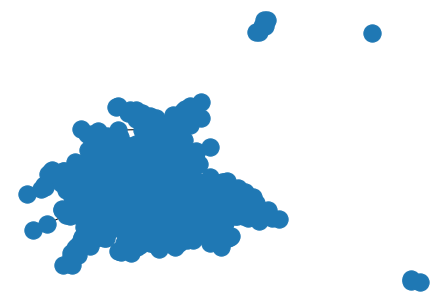

In [24]:
nx.draw(graph)

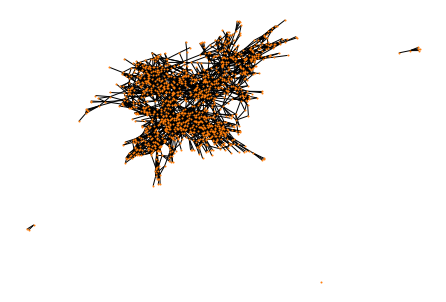

In [25]:
nx.draw(graph,
       node_size=1,
       node_color='C1')

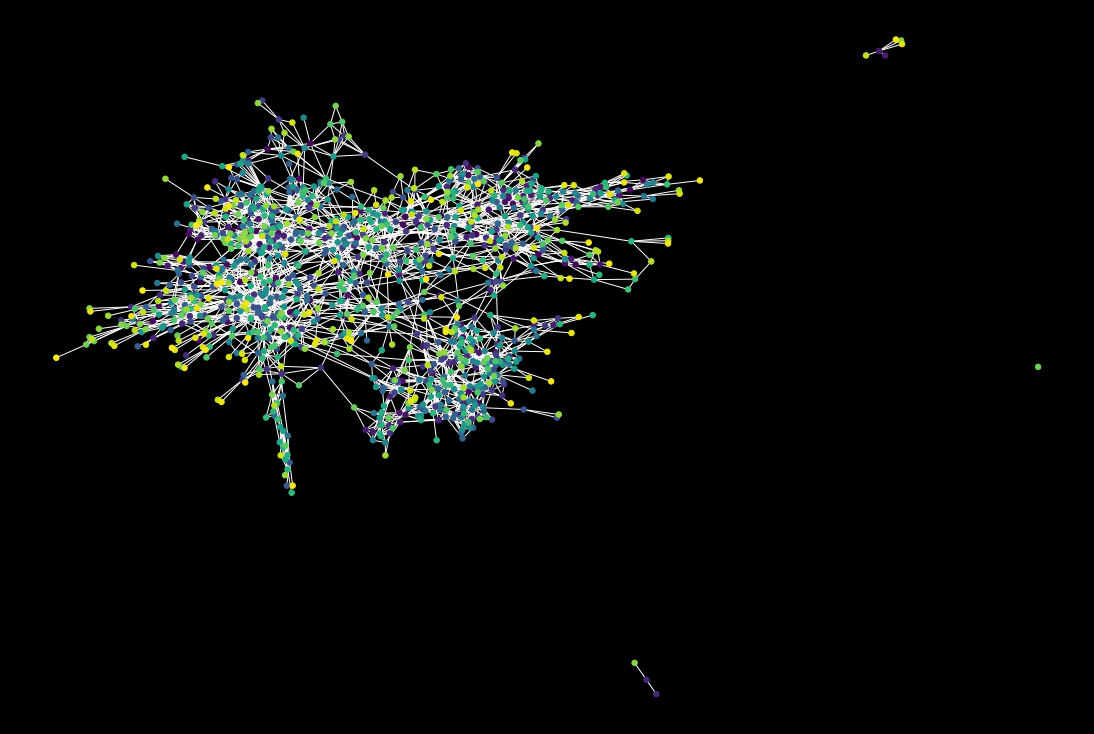

In [29]:
fig = plt.figure(figsize=(15, 10))
colors = np.linspace(0, 1, len(graph.nodes))
nx.draw(graph,
       node_size=30,
       node_color=colors,
       edge_color='white')
fig.set_facecolor('black')

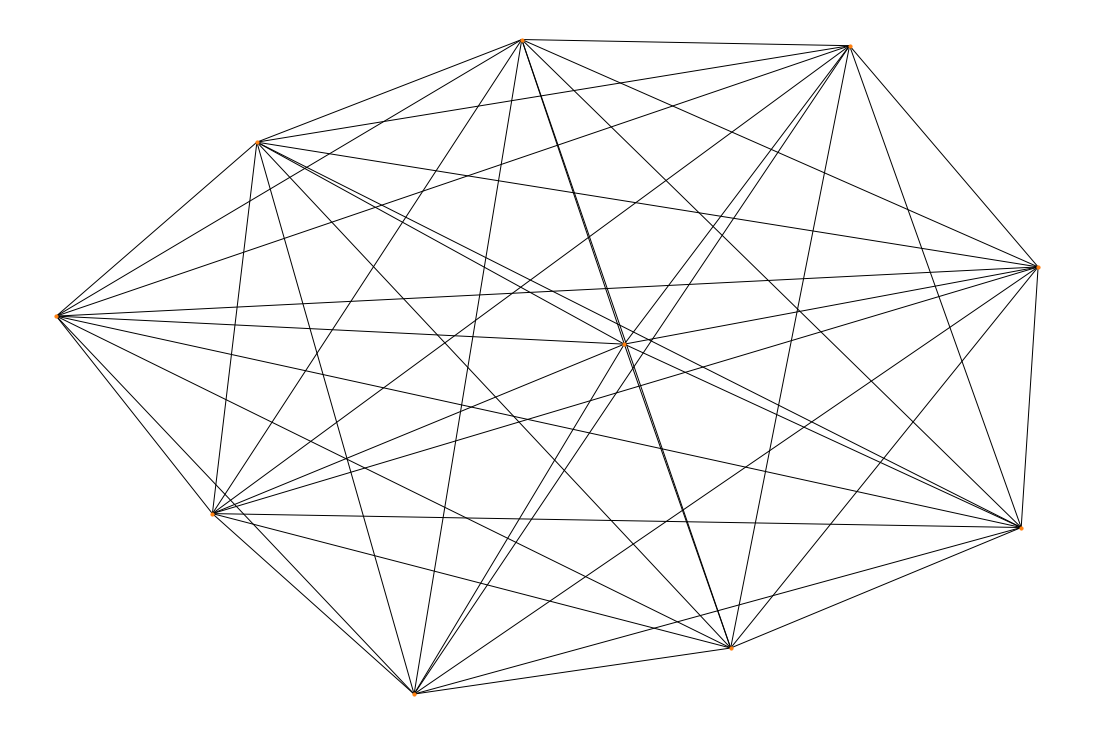

In [43]:
plt.figure(figsize=(15, 10))

k = 0.1 # avg distance between nodes
layout = nx.spring_layout(graph, k = k)

nx.draw(graph,
       node_size=10,
       node_color='C1',
       pos=layout)

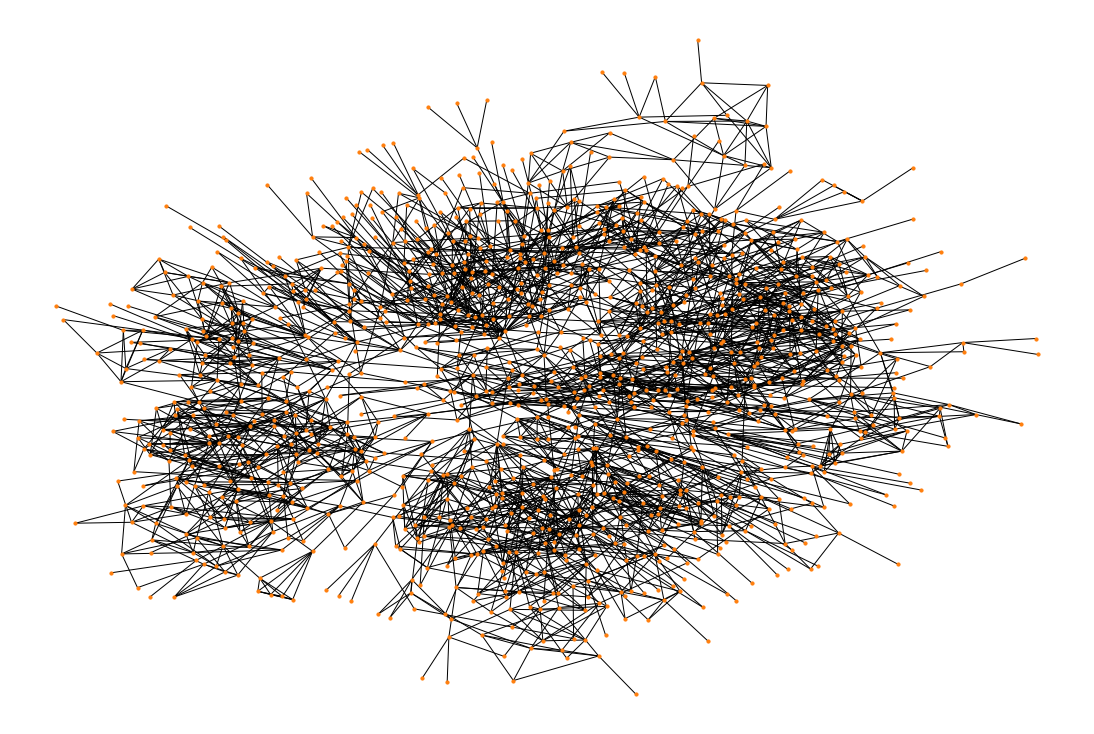

In [34]:
plt.figure(figsize=(15, 10))

layout = nx.kamada_kawai_layout(graph)

nx.draw(graph,
       node_size=10,
       node_color='C1',
       pos=layout)

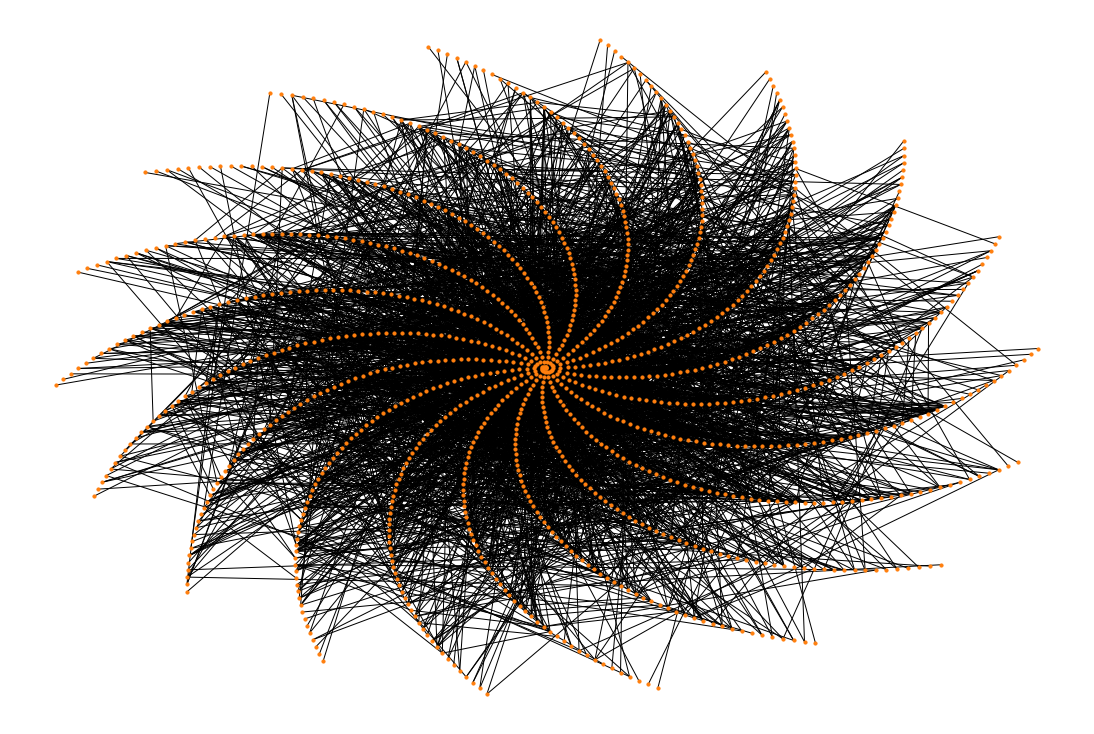

In [35]:
plt.figure(figsize=(15, 10))

layout = nx.spiral_layout(graph)

nx.draw(graph,
       node_size=10,
       node_color='C1',
       pos=layout)

## Summarize Graphs through Centrality Metrics

Indicators of centrality identify the most important vertices within a graph. Applications include identifying the most influential person(s) in a social network, key infrastructure nodes in the Internet or urban networks, and super-spreaders of disease. 

We will discuss 4 types of centrality in this guide.

1. **Degree Centrality**

The number of links incident upon a node (i.e., the number of ties that a node has).

2. **Closeness Centrality**

In a connected graph, the normalized closeness centrality (or closeness) of a node is the average length of the shortest path between the node and all other nodes in the graph.

3. **Betweenness Centrality**

Betweenness is a centrality measure of a vertex within a graph. It quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. 

4. **Katz Centrality**


Katz centrality measures the number of all nodes that can be connected through a path, while the contributions of distant nodes are penalized

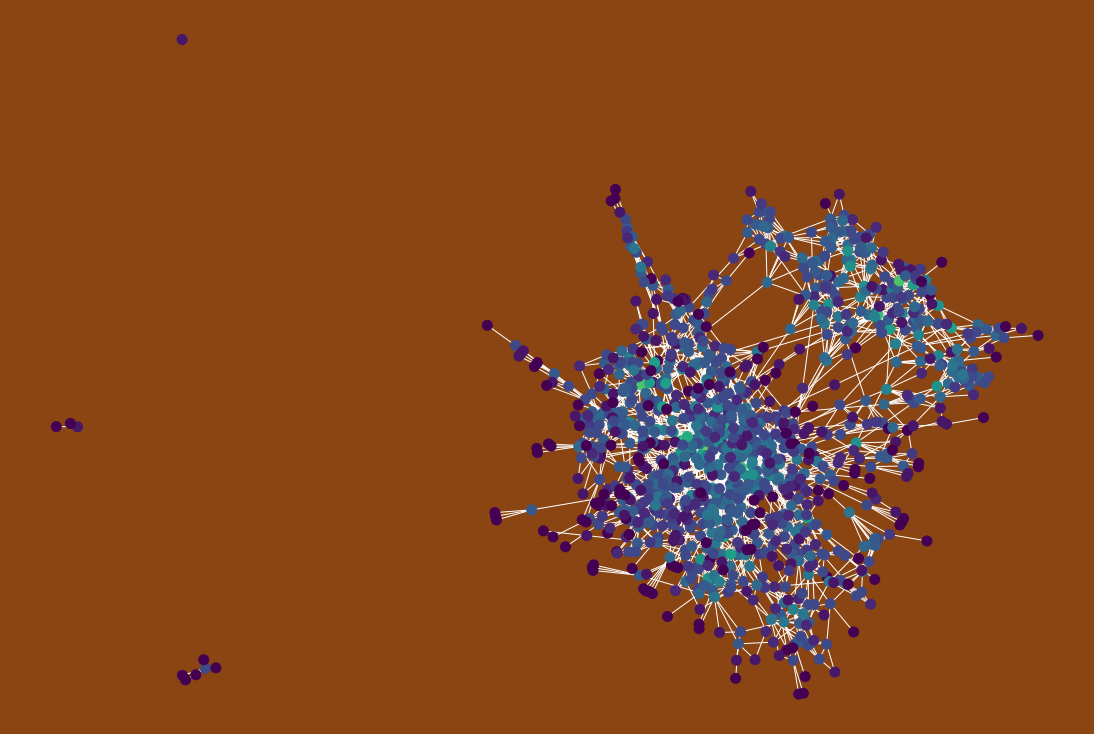

In [36]:
fig = plt.figure(figsize=(15, 10))

centrality = nx.degree_centrality(graph)
colors = list(centrality.values())

nx.draw(graph,
       node_size=100,
       node_color=colors,
       edge_color='white')

fig.set_facecolor('SaddleBrown')

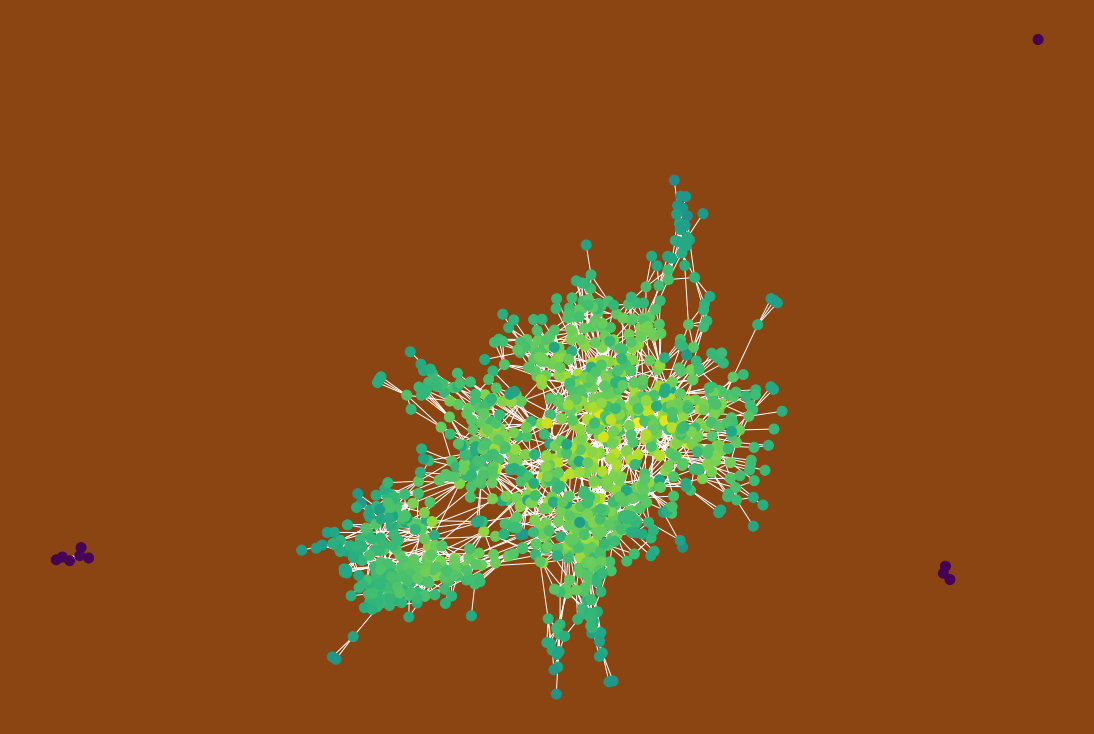

In [37]:
fig = plt.figure(figsize=(15, 10))

centrality = nx.closeness_centrality(graph)
colors = list(centrality.values())

nx.draw(graph,
       node_size=100,
       node_color=colors,
       edge_color='white')

fig.set_facecolor('SaddleBrown')

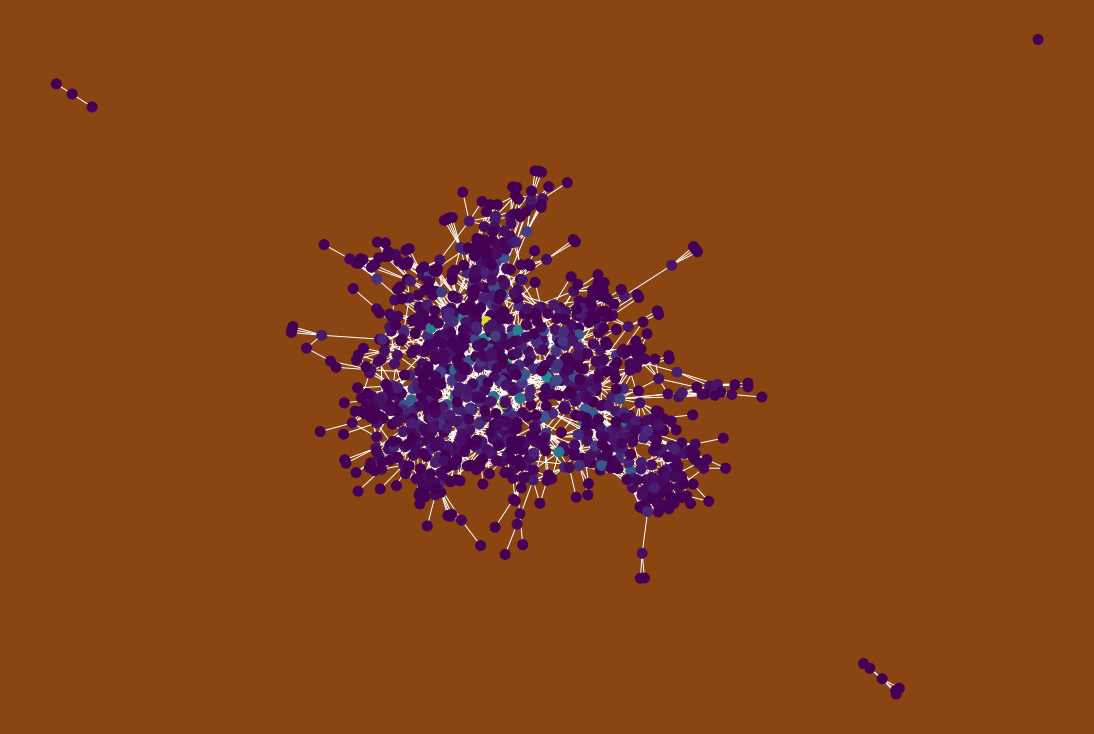

In [39]:
fig = plt.figure(figsize=(15, 10))

centrality = nx.betweenness_centrality(graph)
colors = list(centrality.values())

nx.draw(graph,
       node_size=100,
       node_color=colors,
       edge_color='white')

fig.set_facecolor('SaddleBrown')

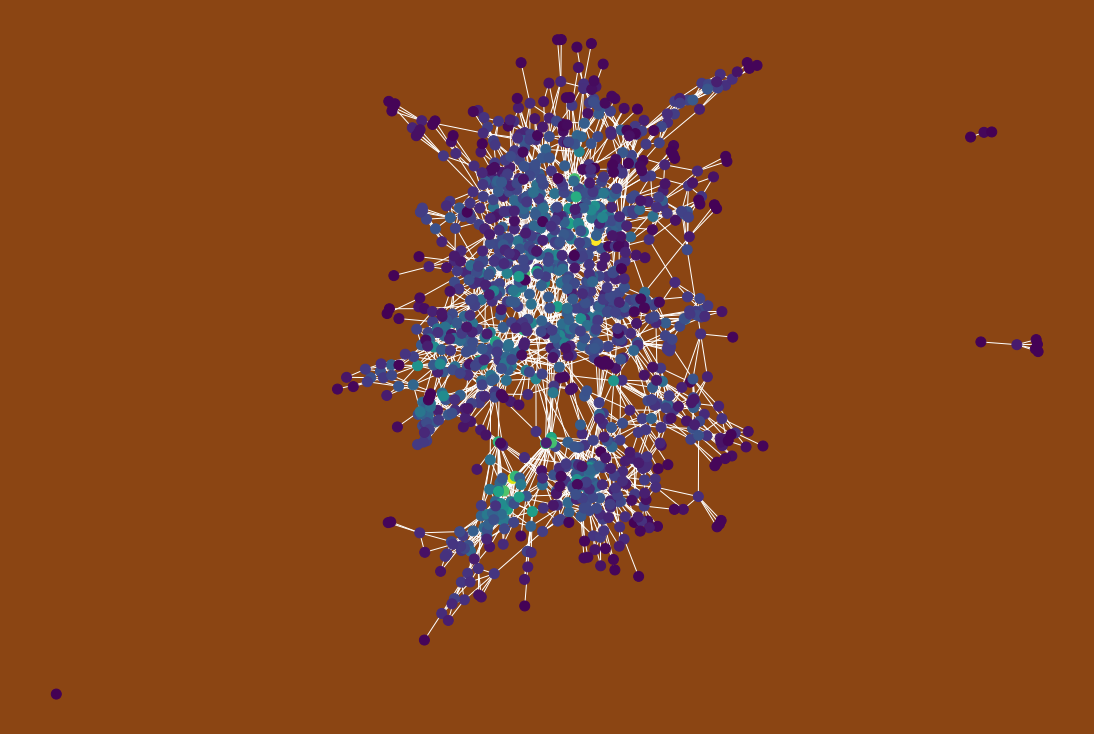

In [40]:
fig = plt.figure(figsize=(15, 10))

centrality = nx.katz_centrality(graph)
colors = list(centrality.values())

nx.draw(graph,
       node_size=100,
       node_color=colors,
       edge_color='white')

fig.set_facecolor('SaddleBrown')

## Create Random Graphs

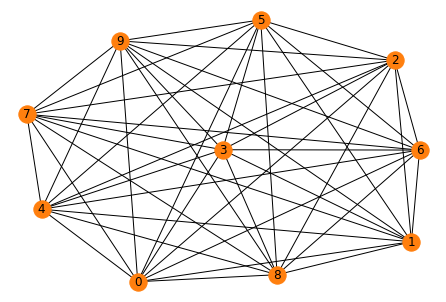

In [42]:
graph = nx.complete_graph(10)
nx.draw(graph,
       node_color='C1',
       with_labels=True)

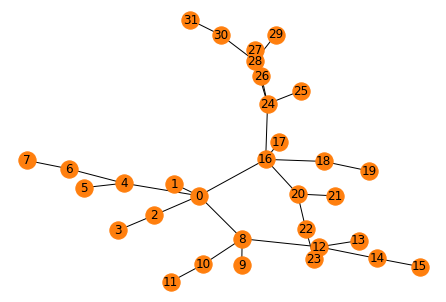

In [47]:
graph = nx.binomial_tree(5)
nx.draw(graph,
       node_color='C1',
       with_labels=True)

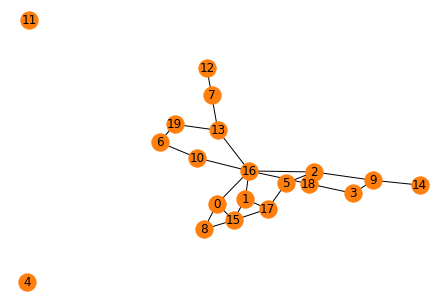

In [48]:
graph = nx.binomial_graph(20, 0.15)
nx.draw(graph,
       node_color='C1',
       with_labels=True)

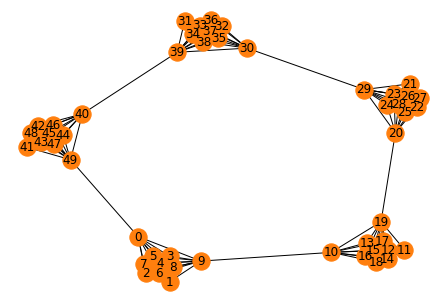

In [49]:
graph = nx.connected_caveman_graph(5, 10)
nx.draw(graph,
       node_color='C1',
       with_labels=True)

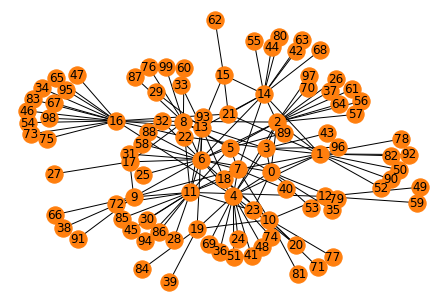

In [50]:
graph = nx.random_internet_as_graph(100)
nx.draw(graph,
       node_color='C1',
       with_labels=True)

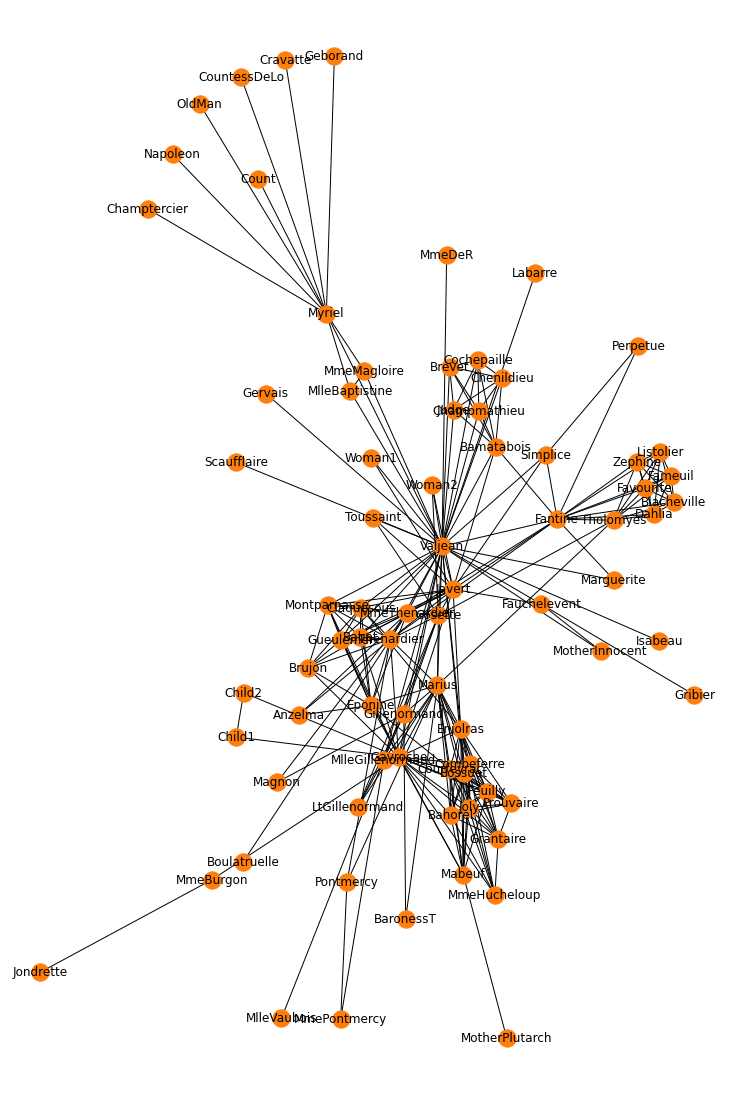

In [51]:
plt.figure(figsize=(10, 15))
graph = nx.les_miserables_graph()
nx.draw(graph,
       node_color='C1',
       with_labels=True)

## Add and Remove Nodes and Edges from Graph

In [59]:
graph = nx.convert_matrix.from_pandas_edgelist(connections_data,
                                              source='From',
                                              target='To',
                                              edge_attr=edge_cols)

nx.set_node_attributes(graph, node_dict) 

In [61]:
node = sample(graph.nodes, 1)[0]
graph.nodes[node]

{'Type': 'Student', 'School (ID)': 20, 'Answered the form': 'Yes'}

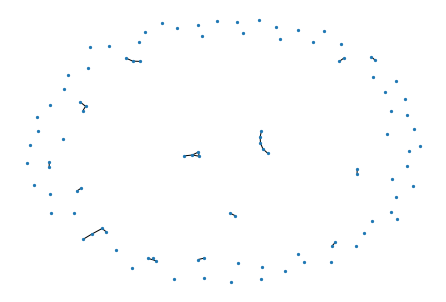

In [62]:
sampled_nodes = sample(graph.nodes, 100)
subgraph = graph.subgraph(sampled_nodes)
nx.draw(subgraph,
       node_size=5,
       with_labels=False)

In [64]:
from collections import defaultdict

nodes_school_id = nx.get_node_attributes(graph, 'School (ID)')
school_nodes = defaultdict(list)
for node, school_id in nodes_school_id.items():
    school_nodes[school_id].append(node)

In [76]:
school_nodes[5]

['S-82d78a', 'S-087f53']

In [66]:
graph.nodes['S-087f53']

{'Type': 'Student', 'School (ID)': 5, 'Answered the form': 'No'}

In [67]:
subgraphs = {}
for school_id, nodes in school_nodes.items():
    subgraph = graph.subgraph(nodes)
    subgraphs[school_id] = subgraph

In [69]:
subgraphs[5].nodes

NodeView(('S-087f53', 'S-82d78a'))

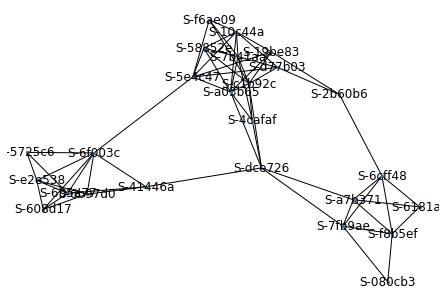

In [70]:
nx.draw(subgraphs[3],
       node_size=5,
       with_labels=True)

## Manipulate Nodes' and Edges' Attributes

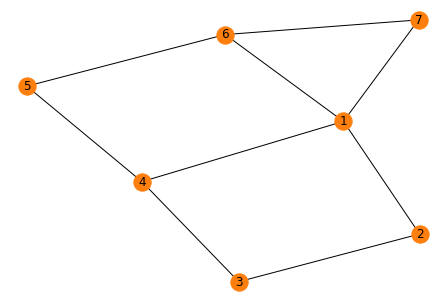

In [78]:
graph = nx.Graph()
edges = [(1,2), (2,3), (3,4),
        (4,5), (5,6), (6,1),
        (1,4), (1,7), (6,7)]
graph.add_edges_from(edges)
nx.draw(graph,
       node_color='C1',
       with_labels=True)

In [79]:
graph.nodes[1]

{}

In [80]:
graph.nodes[1]['category'] = 'A'
graph.nodes[1]

{'category': 'A'}

In [81]:
graph.edges[1,2]

{}

In [82]:
graph.edges[1,2]['weight'] = 2
graph.edges[1,2]

{'weight': 2}

In [87]:
edge_weights = {edge: np.random.rand() for edge in graph.edges}

nx.set_edge_attributes(graph, edge_weights, 'weight')
graph.edges[3, 4]

{'weight': 0.8259786348767426}

In [89]:
node_sizes = {node: np.random.rand() * 300 for node in graph.nodes}

nx.set_node_attributes(graph, node_sizes, 'size')
graph.nodes[5]

{'size': 146.55872952061597}

In [90]:
node_colors = {node: np.random.rand() for node in graph.nodes}
nx.set_node_attributes(graph, node_colors, 'color')

In [91]:
node_colors

{1: 0.26199994546331373,
 2: 0.8123951458727054,
 3: 0.07978983832103037,
 4: 0.3361229718090071,
 5: 0.5042811218227061,
 6: 0.491616243924467,
 7: 0.1326374092400172}

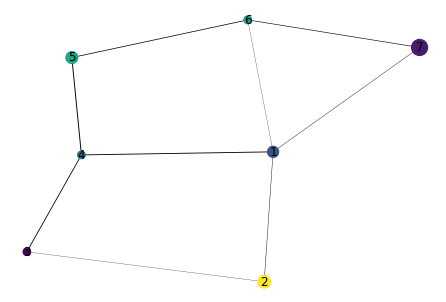

In [93]:
width = list(nx.get_edge_attributes(graph, 'weight').values())
node_size = list(nx.get_node_attributes(graph, 'size').values())
node_color = list(nx.get_node_attributes(graph, 'color').values())

nx.draw(graph,
       width=width,
       node_size=node_size,
       node_color=node_color,
       with_labels=True)

In [94]:
nx.get_node_attributes(graph, 'size')

{1: 129.1647435453087,
 2: 165.72921525254674,
 3: 59.150626551183684,
 4: 60.4013337990272,
 5: 146.55872952061597,
 6: 64.74224930553626,
 7: 264.4898831189787}

## Create and Visualize Sub-Graphs